In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_curve


In this project, I will perform model selection for logistic regression to solve a classification problem. I will complete the following tasks:
    
1. Build my DataFrame and define my ML problem:
    * Load the Airbnb "listings" data set
    * Define the label - what am I predicting?
    * Identify the features
2. Create labeled examples from the data set
3. Split the data into training and test data sets
4. Train, test, and evaluate a logistic regression (LR) model using the scikit-learn default value for hyperparameter $C$
5. Perform a grid search to identify the optimal value of $C$ for a logistic regression model
6. Train, test, and evaluate a logistic regression model using the optimal value of $C$
7. Plot a precision-recall curve for both models
8. Plot the ROC and compute the AUC for both models
9. Perform feature selection
10. Make my model persistent for future use

## Part 1. Building  DataFrame and defining the  ML Problem

In [ ]:
filepath = "airbnbData_train.csv"
df = pd.read_csv(filepath)
print(df.head(5))

## Output hidden

## Part 2. Creating Labeled Examples from the Data Set 

In [ ]:
y = df['host_is_superhost']
X = df.drop(columns = 'host_is_superhost')
print('y: ', y.shape)
print('X: ', X.shape)

y:  (28022,)
X:  (28022, 49)


## Part 3. Creating Training and Test Data Sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(25219, 49)
(2803, 49)
(25219,)
(2803,)


## Part 4. Training, Testing and Evaluating a Logistic Regression Model With Default Hyperparameter Values


In [ ]:
model_default = LogisticRegression(C = 1.0, max_iter = 1000)
model_default.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Making predictions on the test data using the predict_proba() method
proba_predictions_default = [j for (i, j) in model_default.predict_proba(X_test)]
print(proba_predictions_default[:5])

# Making predictions on the test data using the predict() method
class_label_predictions_default = model_default.predict(X_test)
print(class_label_predictions_default[:5])

[0.22328041292306247, 0.42759624811101293, 0.19483985369855042, 0.48802629875612397, 0.3197010894999782]
[False False False False False]


In [ ]:
# Using confusion matrix to get accuracy and more 
cf_matrix = confusion_matrix(y_test, class_label_predictions_default)
print(cf_matrix)

[[2041   99]
 [ 425  238]]


In [ ]:
# Now, calculating the accuracy score per the confusion matrix; true positives = [0][0], true negatives = [1][1]
# correct_results = sum(confusion_matrix[i][i] for i in range(len(confusion_matrix))); np.trace(matrix) does this job
correct_results = np.trace(cf_matrix)
acc_score_cf_matrix = correct_results/(y_test.shape[0])
print("Manual acc score", acc_score_cf_matrix)
acc_score = accuracy_score(y_test, class_label_predictions_default)
print("acc_score", acc_score)

Manual acc score 0.8130574384587942
acc_score 0.8130574384587942


## Part 5. Performing Logistic Regression Model Selection Using Grid Search

In [ ]:
cs = [10**i for i in range(-5,5)]
param_grid = {'C': cs}

param_grid

{'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}

### Performing Grid Search Cross-Validation

In [ ]:
print('Running Grid Search...')

model = LogisticRegression(max_iter = 1000)

grid = GridSearchCV(model, param_grid, cv = 5)
print('grid', grid)

grid_search = grid.fit(X_train, y_train)
print('grid_search', grid_search)

print('Best parameter (C) value ', grid_search.best_params_)
print('Best score', grid_search.best_score_)

print('Done')

Running Grid Search...
grid GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                               1000, 10000]})
grid_search GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                               1000, 10000]})
Best parameter (C) value  {'C': 1000}
Best score 0.8062964925117424
Done


In [ ]:
best_C = grid_search.best_params_
best_C

{'C': 1000}

## Part 6. Training, Testing and Evaluating the Optimal Logistic Regression Model

In [ ]:
model_best = LogisticRegression(max_iter = 1000, C = best_C.get('C'))

model_best.fit(X_train, y_train)

LogisticRegression(C=1000, max_iter=1000)

In [ ]:
# Making predictions on the test data using the predict_proba() method
prob_predictions = model_best.predict_proba(X_test)
proba_predictions_best = [j for (i,j) in prob_predictions]
print(proba_predictions_best[:5])

# Making predictions on the test data using the predict() method
class_label_predictions_best = model_best.predict(X_test)
print(class_label_predictions_best[:5])

[0.22218998319898695, 0.424722849514124, 0.19569289851743046, 0.48818704785379996, 0.3202566222320873]
[False False False False False]


In [ ]:
cf_matrix_best = confusion_matrix(y_test, class_label_predictions_best)
print(cf_matrix_best)
acc_score = (np.trace(cf_matrix_best)) / (y_test.shape[0])
print("Best accuracy score is: ", acc_score)
print("As per accuracy_score, accuracy is: ", accuracy_score(y_test, class_label_predictions_best))

[[2041   99]
 [ 425  238]]
Best accuracy score is:  0.8130574384587942
As per accuracy_score, accuracy is:  0.8130574384587942


## Part 7.  Plotting Precision-Recall Curves for Both Models

In [ ]:
precision_default, recall_default, thresholds_default = precision_recall_curve(y_test, proba_predictions_default)
precision_best, recall_best, thresholds_best = precision_recall_curve(y_test, proba_predictions_best)

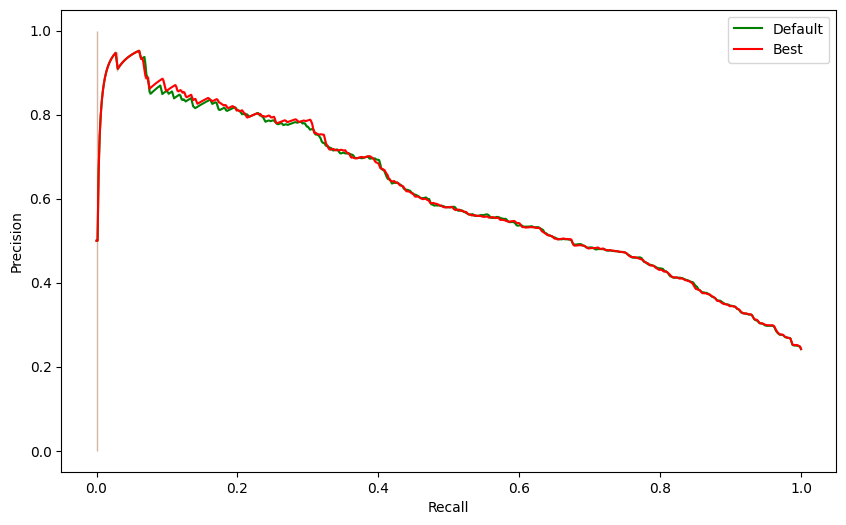

In [ ]:
plt.figure(figsize = (10, 6))
sns.lineplot(x = recall_default, y = precision_default, color = 'green', label = 'Default')
sns.lineplot(x = recall_best, y = precision_best, color = 'red', label = 'Best')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

## Part 8. Plotting ROC Curves and Compute the AUC for Both Models

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [ ]:
fpr_default, tpr_default, thresholds_default = roc_curve(y_test, proba_predictions_default)
fpr_best, tpr_best, thresholds_best = roc_curve(y_test, proba_predictions_best)

#### Plotting ROC Curve for Default Hyperparameter:

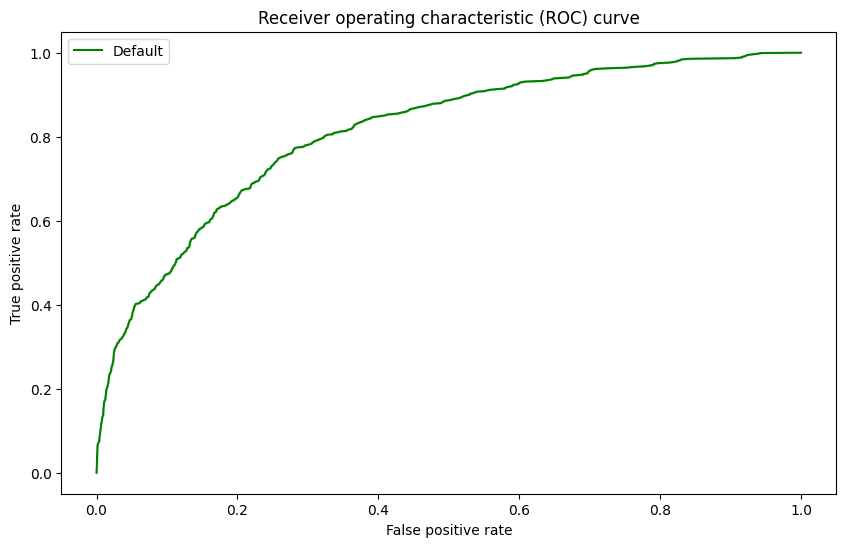

In [ ]:
plt.figure(figsize = (10,6))
sns.lineplot(x = fpr_default, y = tpr_default, color = 'green', label = 'Default')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("Receiver operating characteristic (ROC) curve")
plt.legend()
plt.show()

#### Plotting ROC Curve for Best Hyperparameter:

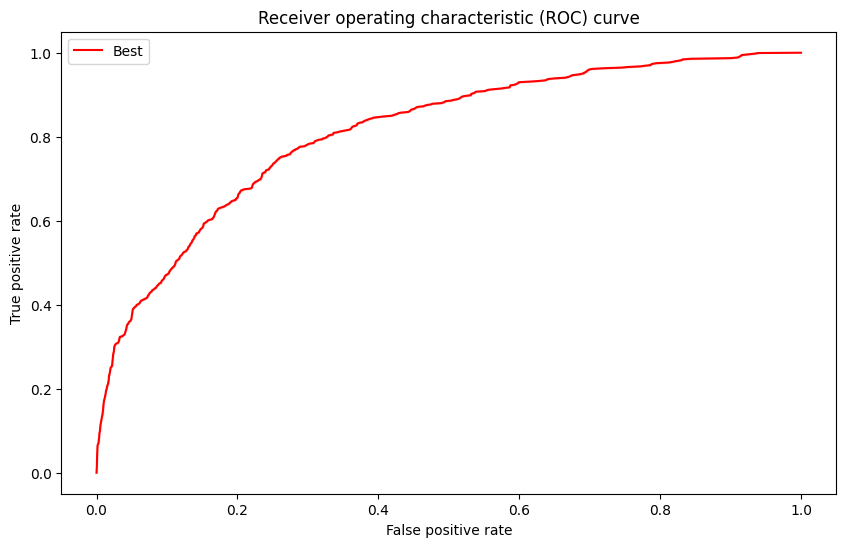

In [ ]:
plt.figure(figsize = (10,6))
sns.lineplot(x = fpr_best, y = tpr_best, color = 'red', label = 'Best')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("Receiver operating characteristic (ROC) curve")
plt.legend()
plt.show()

In [ ]:
auc_default = auc(fpr_default, tpr_default)
auc_best = auc(fpr_best, tpr_best)

print(auc_default)
print(auc_best)

0.8117118450543409
0.8118232051986862


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

selector = SelectKBest(f_classif, k=9)# Used k values during testing: k = 7, 10, 3, 8, 9
selector.fit(X, y)
filter = selector.get_support()
top_9_features = X.columns[filter]

print("Best 9 features:")
print(top_9_features)

new_X_train = X_train[top_9_features]
new_X_test = X_test[top_9_features]

model = LogisticRegression(C = best_C.get('C'), max_iter = 1000)

model.fit(new_X_train, y_train)

proba_predictions = [j for (i,j) in model.predict_proba(new_X_test)]

fpr, tpr, thresholds = roc_curve(y_test, proba_predictions)
auc_result = auc(fpr, tpr)
print(auc_result)


Best 9 features:
Index(['host_response_rate', 'host_acceptance_rate', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_cleanliness',
       'review_scores_value', 'reviews_per_month'],
      dtype='object')
0.8013757911503926


In [ ]:
import pickle
filename = 'model_best.pkl'

with open(filename, 'wb') as file:
    pickle.dump(model_best, file)

In [ ]:
with open(filename, 'rb') as file:
    model = pickle.load(file)

class_label_predictions = model.predict(X_test)
print(loaded_class_label_predictions)